In [207]:
import numpy as np
import importlib
import math
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R

In [240]:
P1 = np.array([[1,0,0,0.5],[0,1,0,-0.25],[0,0,1,0.3],[0,0,0,1]])
P2 = np.array([[1,0,0,-0.1],[0,1,0,0.4],[0,0,1,0.2],[0,0,0,1]])
P3 = np.array([[1,0,0,-0.7],[0,1,0,0],[0,0,1,0.4],[0,0,0,1]])

# Distance in meter
Dist_12 = round(np.linalg.norm(np.array([P1[0,3],P1[1,3],P1[2,3]])-np.array([P2[0,3],P2[1,3],P2[2,3]])),3)
Dist_13 = round(np.linalg.norm(np.array([P1[0,3],P1[1,3],P1[2,3]])-np.array([P3[0,3],P3[1,3],P3[2,3]])),3)
Dist_23 = round(np.linalg.norm(np.array([P2[0,3],P2[1,3],P2[2,3]])-np.array([P3[0,3],P3[1,3],P3[2,3]])),3)
print(Dist_12)
print(Dist_13)
print(Dist_23)

0.89
1.23
0.748


In [356]:
begin = 0  #s
end = 1000  #s
hz = 20    #Hz
t = np.linspace(begin, end, (end-begin)*hz)
speed_linear = (np.cos(t+np.pi)+1)*2/2
#speed_linear = [0.2]*len(t)
#speed_yaw = (np.cos(t/(end-begin)+np.pi)+1)*np.sin(t/2)*0.5
speed_yaw = np.sin(0.1*math.pi*t)/(5*math.pi)*np.cos(0.2*math.pi*t)
#speed_yaw = [0.5*math.pi/180]*len(t)
#speed_yaw = [0.2*math.pi/180]*len(t)
#speed_yaw = [0*math.pi/180]*len(t)

T_2d = []
T_3d = []
angle = []
x = []
y = []
T_2d.append(np.array([[0, 0, 0],[0, 0, 0],[0,0,1]]))
T_3d.append(np.array([[1, 0, 0, 0],[0, 1, 0, 0], [0,0,1,0],[0,0,0,1]]))
angle.append(0)
x.append(0)
y.append(0)

for i in range(1, len(t)):
    dx = speed_linear[i]*1/hz
    dy = speed_linear[i]*1/hz
    former_angle = angle[i-1]
    new_angle = former_angle + speed_yaw[i]
    R_new = np.array([[np.cos(new_angle),-np.sin(new_angle)],[np.sin(new_angle),np.cos(new_angle)]])
    P_new = R_new[0:2,0:2]@[dx,dy]+[x[i-1],y[i-1]]
    
    T_new_2d = np.column_stack((R_new, P_new.T))
    array_0 = np.array([[0,0,1]])
    T_new_new_2d = np.concatenate((T_new_2d, array_0), axis=0)
    T_2d.append(T_new_new_2d)
    
    P_3d = np.array([P_new[0], P_new[1], 0, 1])
    array_1 = np.array([0,0])
    array_2 = np.array([[0,0,1]])
    array_3 = np.array([[0,0,0]])
    T_new_3d = np.column_stack((R_new, array_1.T))
    T_new_new_3d = np.concatenate((T_new_3d, array_2, array_3), axis=0)
    T_new_new_new_3d = np.column_stack((T_new_new_3d, P_3d.T))
    T_3d.append(T_new_new_new_3d)
    
    angle.append(new_angle)
    x.append(P_new[0])
    y.append(P_new[1])

<IPython.core.display.Javascript object>


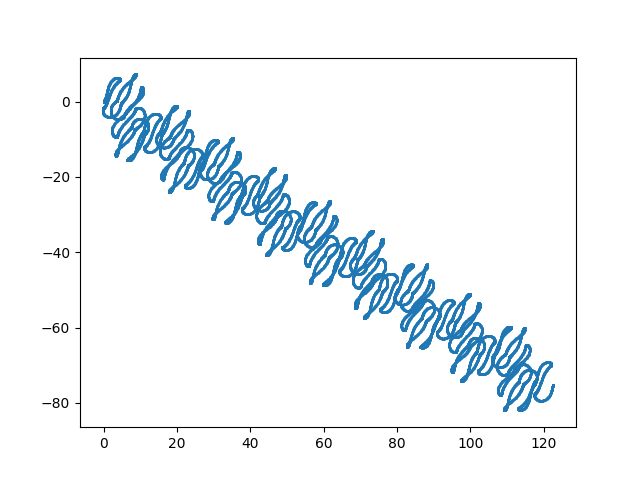

In [357]:
%matplotlib notebook
#plt.plot(t, x)
#plt.plot(t, y)
T_arr = np.array(T_3d)
#print(T_arr[:,0,2])
plt.scatter(T_arr[:,0,3],T_arr[:,1,3], s=1)
#plt.plot(t,angle)
#plt.plot(t,x)
#plt.plot(t,y)

20000


<IPython.core.display.Javascript object>


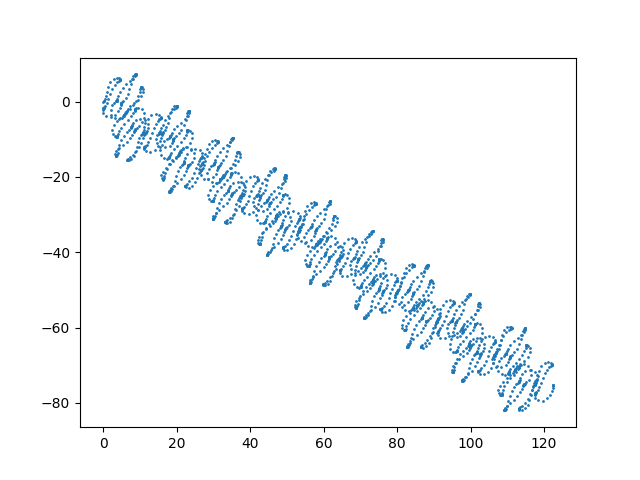

In [358]:
%matplotlib notebook
print(len(T_arr))
subsampling = 10
T_sub = []
for i in range(0,len(T_arr)):
    if(i%subsampling==0):
        T_sub.append(T_arr[i])
#plt.plot(t, x)
#plt.plot(t, y)
T_sub_arr = np.array(T_sub)
#print(T_arr[:,0,2])
plt.scatter(T_sub_arr[:,0,3],T_sub_arr[:,1,3], s=1)
#plt.plot(t,angle)
#plt.plot(t,x)
#plt.plot(t,y)

<IPython.core.display.Javascript object>


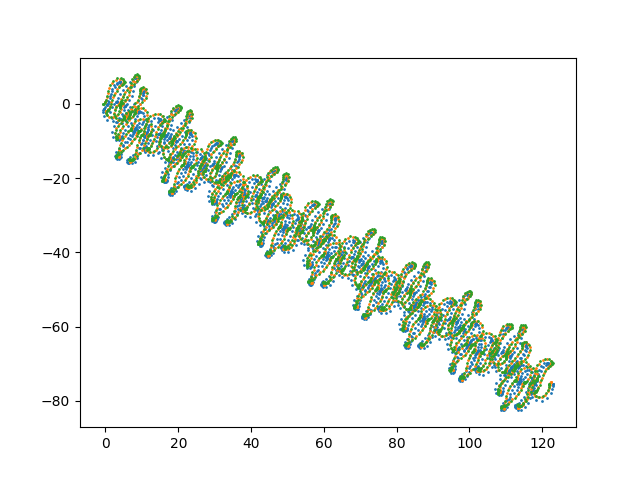

In [363]:
%matplotlib notebook
#print(np.array(T_3d[1000])@P1)
T_p1 = T_sub@P1
T_p2 = T_sub@P2
T_p3 = T_sub@P3

plt.scatter(T_p1[:,0,3],T_p1[:,1,3], s=1)
plt.scatter(T_p2[:,0,3],T_p2[:,1,3], s=1)
plt.scatter(T_p3[:,0,3],T_p3[:,1,3], s=1)

In [360]:
d12 = []
d13 = []
d23 = []
for i,j,k in zip(T_p1,T_p2,T_p3):
    p1 = np.array([i[0,3],i[1,3],i[2,3]])
    p2 = np.array([j[0,3],j[1,3],j[2,3]])
    p3 = np.array([k[0,3],k[1,3],k[2,3]])
    d12.append(round(np.linalg.norm(p1-p2),3))
    d13.append(round(np.linalg.norm(p1-p3),3))
    d23.append(round(np.linalg.norm(p2-p3),3))

<IPython.core.display.Javascript object>


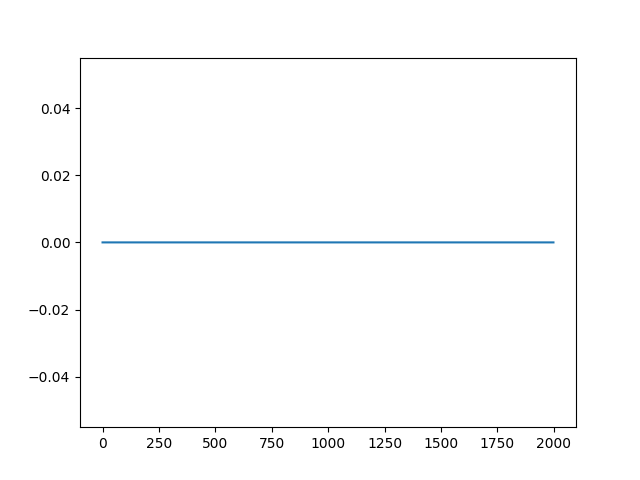

In [362]:
plt.plot(d13-Dist_13)